Código de procesamiento y/o análisis.

In [1]:
!pip install SimpleITK
!pip install pydicom


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


Importación de librerías necesarias.

In [2]:
# Librerias 
import SimpleITK as sitk  # Importación de módulo(s).
import matplotlib.pyplot as plt  # Importación de módulo(s).
import pydicom  # Importación de módulo(s).
import matplotlib.pyplot as plt  # Importación de módulo(s).
import os  # Importación de módulo(s).
import pydicom  # Importación de módulo(s).
import numpy as np  # Importación de módulo(s).
import pandas as pd  # Importación de módulo(s).
import os  # Importación de módulo(s).
import glob  # Importación de módulo(s).
import pickle   # Importación de módulo(s).

from tqdm import tqdm  # Importación específica de funciones/clases.
from sklearn.model_selection import train_test_split  # Importación específica de funciones/clases.

Visualización de resultados.

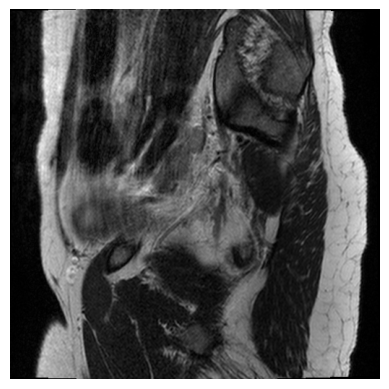

In [4]:
# Leer la carpeta con varios DICOM
image = sitk.ReadImage("/src/Micro-proyecto_Cancer_data/manifest/TCGA-CESC/TCGA-VS-A8EB/05-05-2004-NA-RESSONANCIA MAGNETICA DE ABDOME INFERIOR-20151/401.000000-SAG T2-12004/1-01.dcm")

# Convertir a array
array = sitk.GetArrayFromImage(image)  # [slices, rows, cols]

# Mostrar un corte intermedio
plt.imshow(array[array.shape[0]//2], cmap='gray')  # Configuración o generación de visualización.
plt.axis('off')  # Configuración o generación de visualización.
plt.show()  # Configuración o generación de visualización.

Lectura de datos desde archivo.

In [5]:
clinical_data= pd.read_csv("./cesc_tcga_gdc_clinical_data.tsv", sep="\t")  # Lectura de datos en un DataFrame desde CSV.

Obtener los identificadores de los pacientes.

In [6]:
# Ruta de la carpeta
ruta = "/src/Micro-proyecto_Cancer_data/manifest/TCGA-CESC/"

# Lista de nombres de archivos y carpetas
nombres = [i for i in os.listdir(ruta) if '.' not in i]
print(nombres)

['TCGA-VS-A8Q9', 'TCGA-VS-A8QA', 'TCGA-VS-A8QC', 'TCGA-VS-A8QF', 'TCGA-VS-A8QH', 'TCGA-VS-A8QM', 'TCGA-VS-A94W', 'TCGA-VS-A94X', 'TCGA-VS-A94Y', 'TCGA-VS-A94Z', 'TCGA-VS-A950', 'TCGA-VS-A952', 'TCGA-VS-A953', 'TCGA-VS-A954', 'TCGA-VS-A957', 'TCGA-VS-A958', 'TCGA-VS-A959', 'LICENSE', 'TCGA-VS-A8EB', 'TCGA-VS-A8EC', 'TCGA-VS-A8EG', 'TCGA-VS-A8EH', 'TCGA-VS-A8EI', 'TCGA-VS-A8EJ', 'TCGA-VS-A8EK', 'TCGA-VS-A8EL', 'TCGA-VS-A8Q8', 'TCGA-VS-A9U5', 'TCGA-VS-A9U6', 'TCGA-VS-A9U7', 'TCGA-VS-A9UA', 'TCGA-VS-A9UB', 'TCGA-VS-A9UC', 'TCGA-VS-A9UD', 'TCGA-VS-A9UH', 'TCGA-VS-A9UI', 'TCGA-VS-A9UJ', 'TCGA-VS-A9UL', 'TCGA-VS-A9UM', 'TCGA-VS-A9UO', 'TCGA-VS-A9UP', 'TCGA-VS-A9UQ', 'TCGA-VS-A9UR', 'TCGA-VS-A9UT', 'TCGA-VS-A9UU', 'TCGA-VS-A9UV', 'TCGA-VS-A9UY', 'TCGA-VS-A9UZ', 'TCGA-VS-A9V0', 'TCGA-VS-A9V1', 'TCGA-VS-A9V2', 'TCGA-VS-A9V3', 'TCGA-VS-A9V4', 'TCGA-VS-A9V5', 'TCGA-VS-AA62']


Dataset filtrado por paciente con estudios clínicos. 

In [7]:
df_filtrado = clinical_data[clinical_data["Patient ID"].isin(nombres)]
df_filtrado.shape

(54, 43)

In [8]:
df_filtrado.value_counts('Disease Type')  # Conteo de frecuencias.

Disease Type
Cervical Squamous Cell Carcinoma                42
Mucinous Adenocarcinoma of Endocervical Type    12
Name: count, dtype: int64

Conjunto de datos que contiene las rutas de las imágenes asociadas a cada ID de paciente.

In [9]:
images = glob.glob(f'{ruta}/**/*.dcm', recursive=True)
images = pd.DataFrame(images, columns=['path'])
images['Patient ID'] = [i.split('/')[-4] for i in images.path]

In [ ]:
images.head()

,path,Patient ID
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8Q9
...,...,...
19130,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62
19131,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62
19132,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62
19133,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-AA62


Separación de datos para entrenamiento y prueba.

In [12]:
#Data Split
X_train, X_test = train_test_split(df_filtrado[['Patient ID', 'Disease Type']], test_size=0.3, random_state=0, stratify=df_filtrado['Disease Type'])  # División de datos en entrenamiento y prueba.
X_val, X_test = train_test_split(X_test, test_size=0.5, random_state=0, stratify=X_test['Disease Type'])  # División de datos en entrenamiento y prueba.

Combinación de conjuntos de datos.

In [13]:
X_train = pd.merge(images, X_train, on='Patient ID')  # Unión/combinación de DataFrames.
X_val = pd.merge(images, X_val, on='Patient ID')  # Unión/combinación de DataFrames.
X_test = pd.merge(images, X_test, on='Patient ID')  # Unión/combinación de DataFrames.

Dimensiones de los datos de entrenamiento, validación y prueba.

In [14]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (13635, 3)
Validation shape: (3273, 3)
Test shape: (2227, 3)


Conteo de frecuencias de los conjuntos de datos.

In [ ]:
X_train.value_counts('Disease Type')  # Conteo de frecuencias.
print("--- V ---")
X_val.value_counts('Disease Type')  # Conteo de frecuencias.
print("--- V ---")
X_test.value_counts('Disease Type')  # Conteo de frecuencias.

Disease Type
Cervical Squamous Cell Carcinoma                8517
Mucinous Adenocarcinoma of Endocervical Type    5118
Name: count, dtype: int64

El siguiente código amplía el DataFrame de entrenamiento incorporando una columna que contiene, para cada paciente, tanto la ruta de la imagen como la imagen cargada en forma de arreglo NumPy lista para su procesamiento.

In [ ]:
# Training data 
X_train = X_train.reset_index(drop=True)
X_train['image'] = None
for ix,i in tqdm(enumerate(X_train.path)):
    image = sitk.ReadImage(i)
    image = sitk.GetArrayFromImage(image)
    
    X_train.loc[ix, 'image'] = image  # Selección indexada de filas/columnas.

13635it [01:03, 214.33it/s]


In [20]:
X_val = X_val.reset_index(drop=True)
X_val['image'] = None
for ix,i in tqdm(enumerate(X_val.path)):
    image = sitk.ReadImage(i)
    image = sitk.GetArrayFromImage(image)
    X_val.loc[ix, 'image'] = image  # Selección indexada de filas/columnas.

3273it [00:24, 133.21it/s]


In [21]:
X_test = X_test.reset_index(drop=True)
X_test['image'] = None
for ix,i in tqdm(enumerate(X_test.path)):
    image = sitk.ReadImage(i)
    image = sitk.GetArrayFromImage(image)
    
    X_test.loc[ix, 'image'] = image  # Selección indexada de filas/columnas.

2227it [00:24, 90.65it/s] 


Dimensiones de los conjuntos.

In [24]:
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (13635, 4)
Validation shape: (3273, 4)
Test shape: (2227, 4)


Guardar los conjuntos de datos.

In [ ]:
pickle.dump(X_train, open('./data/X_train_raw.pk', 'wb'))  # Guardar datos en un archivo pickle.
pickle.dump(X_val, open('./data/X_val_raw.pk', 'wb'))  
pickle.dump(X_test, open('./data/X_test_raw.pk', 'wb'))  

In [26]:
!ls ./data/*.pk -lstgha

1.3G -rwxrwxrwx 1 root 1.3G Aug 29 23:55 ./data/X_test_raw.pk
2.3G -rwxrwxrwx 1 root 2.3G Aug 29 23:55 ./data/X_val_raw.pk
6.2G -rwxrwxrwx 1 root 6.2G Aug 29 23:55 ./data/X_train_raw.pk


Visualización de resultados.

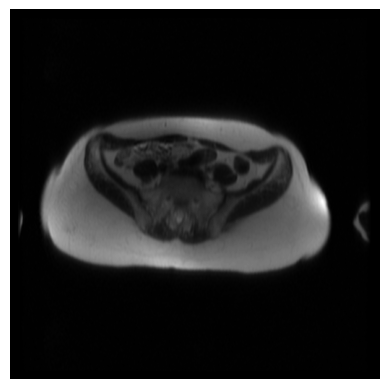

In [189]:
plt.imshow(X_train.loc[4].image[0], cmap='gray')  # Selección indexada de filas/columnas.
plt.axis('off')  # Configuración o generación de visualización.
plt.show()  # Configuración o generación de visualización.

Visualizar el conjunto de datos.

In [28]:
X_train.head()

,path,Patient ID,Disease Type,image
0,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
1,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,/src/Micro-proyecto_Cancer_data/manifest/TCGA-...,TCGA-VS-A8QA,Cervical Squamous Cell Carcinoma,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
